In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
r = 0.6
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo

In [3]:
def trial_line():
    plots.figure(figsize=(7,7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x_demo, y_demo, s=10)
    #plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
    plots.plot([-4,4],[-4,4], color='r', lw=2)
    #plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.xlabel('x in standard units')
    plots.ylabel('y in standard units');

In [4]:
def trial_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)

In [5]:
def both_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)

In [6]:
def regression_line(r):
    x = np.random.normal(0, 1, 10000)
    z = np.random.normal(0, 1, 10000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.figure(figsize=(7, 7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x, y, s=10)
    plots.plot([-4, 4], [-4*r,4*r], color='g', lw=2)
    if r >= 0:
        plots.plot([-4,4],[-4,4], lw=2, color='r')
    else:
        plots.plot([-4,4], [4,-4], lw=2, color='r')

## Prediction ##

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [7]:
young_mod = Table.read_table('young_mod.csv')

youngs = Table().with_columns(
    'Ed', young_mod.column('Ed'),
    'E', young_mod.column('E')
    )

In [8]:
youngs

Ed,E
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


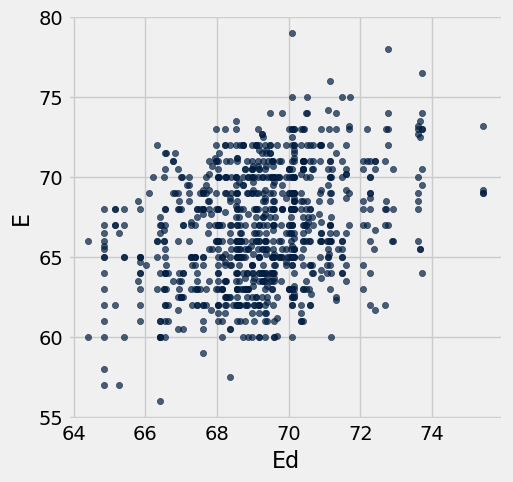

In [9]:
youngs.scatter('Ed')

In [10]:
def predict_e(x):
    chosen = youngs.where('Ed', are.between(x - 0.5, x + 0.5))
    return np.average(chosen.column('E'))

In [11]:
predictions = youngs.apply(predict_e,'Ed')

In [12]:
youngs = youngs.with_column('Original prediction',predictions)

In [13]:
youngs

Ed,E,Original prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


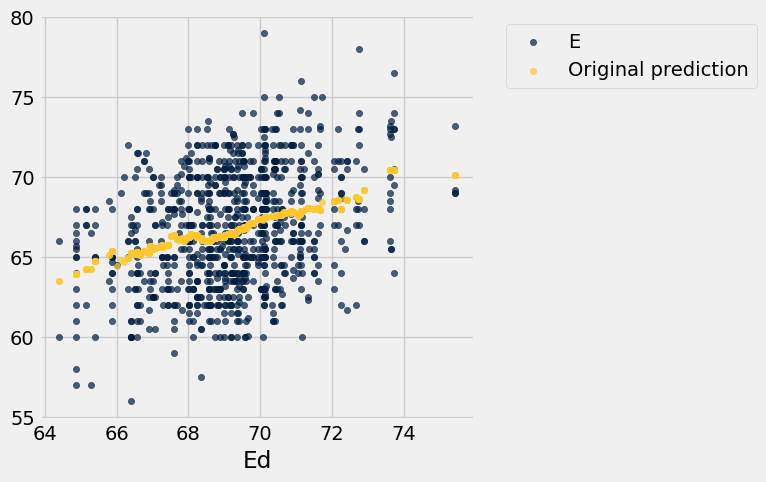

In [14]:
youngs.scatter('Ed')

## Linear Regression ##

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

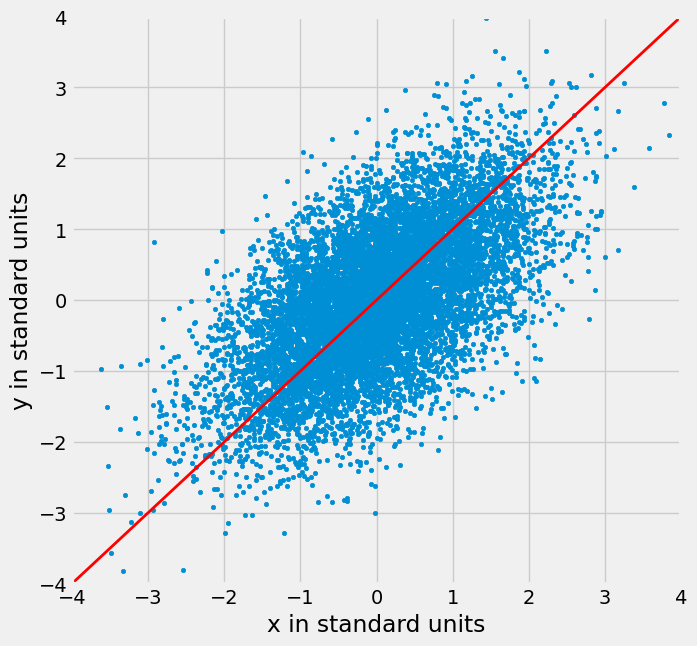

In [15]:
trial_line()

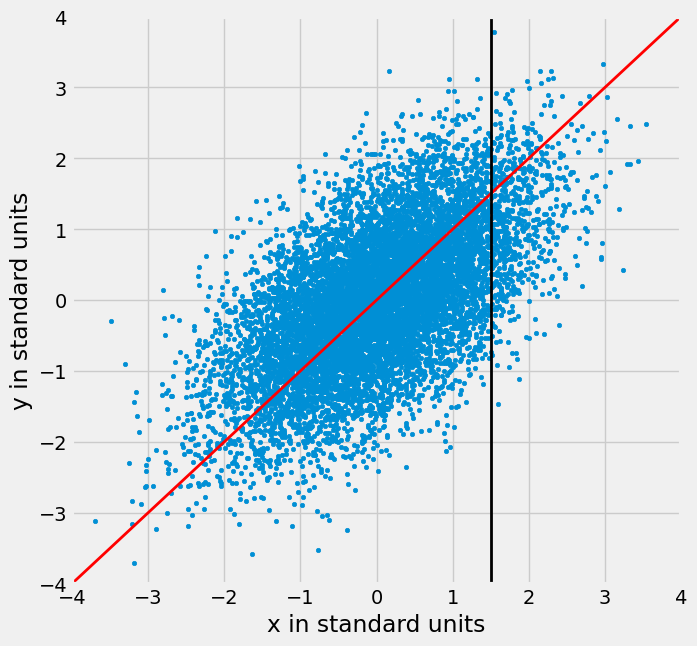

In [15]:
trial_with_vertical()

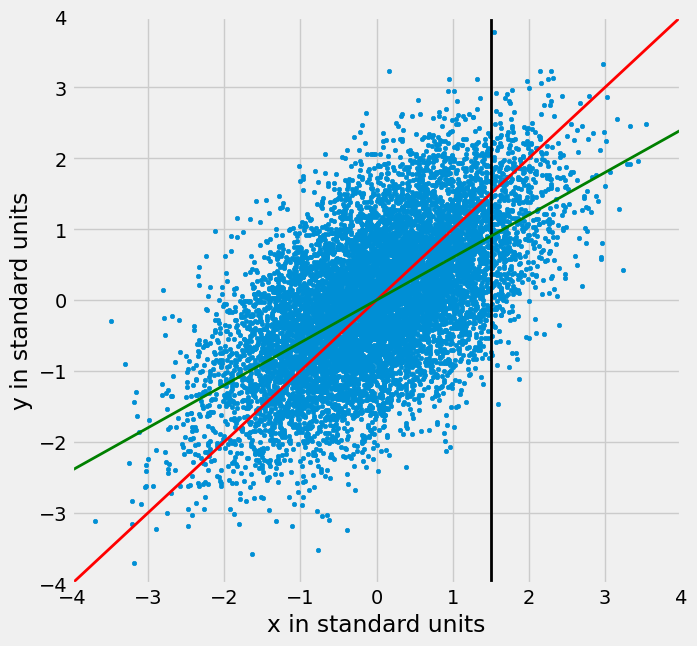

In [16]:
both_with_vertical()

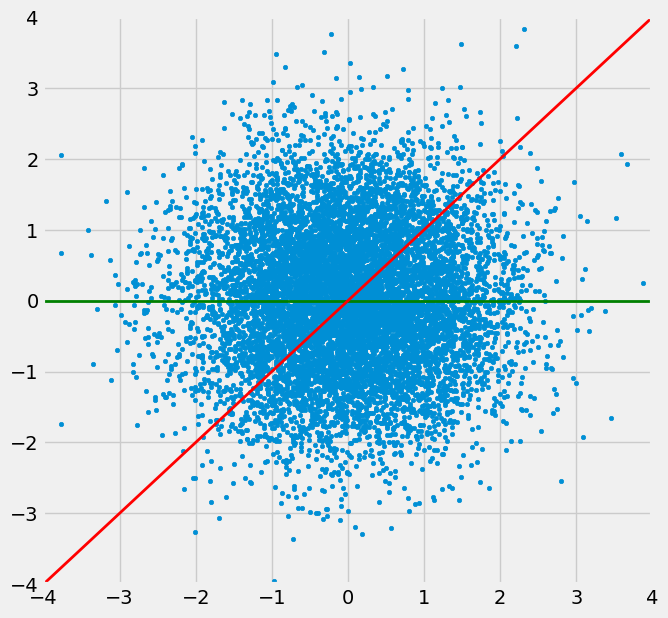

In [22]:
r = 0
regression_line(r)

## Equation of the Regression Line ##

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [26]:
def standart_units(x):
    return (x-np.average(x))/np.std(x)

def correlation(t, x, y):
    x_su = standart_units(t.column(x))
    y_su = standart_units(t.column(y))
    return np.average(x_su*y_su)

def slope(t, x, y):
    r = correlation(t, x, y)
    return r*np.std(t.column(y))/np.std(t.column(x))

def intercept(t, x, y):
    a = slope(t, x, y)
    return np.average(t.column(y)) - a*np.average(t.column(x))

In [27]:
youngs

Ed,E,Original prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


In [28]:
young_mod_slope = slope(youngs, 'Ed', 'E')
young_mod_intercept = intercept(youngs, 'Ed', 'E')
young_mod_slope, young_mod_intercept

(0.63736089696947895, 22.636240549589751)

In [29]:
youngs.take(123)

Ed,E,Original prediction
69.48,71.5,66.7588


In [30]:
young_mod_slope*69.48 + young_mod_intercept

66.920075671029153

In [31]:
def fitted_values(t, x ,y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

In [32]:
regression_prediction = fitted_values(youngs,'Ed', 'E')

In [34]:
youngs = youngs.with_column('Regression Prediction', regression_prediction)

In [35]:
youngs

Ed,E,Original prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


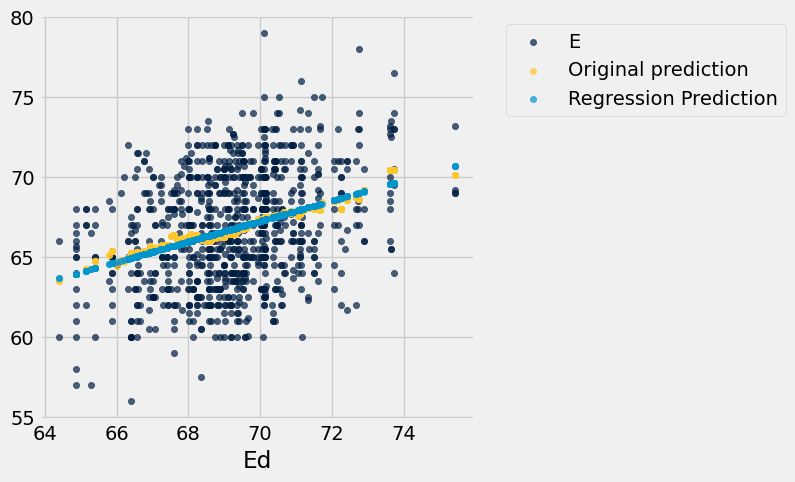

In [36]:
youngs.scatter('Ed')